In [7]:
%load_ext autoreload
%autoreload 2

import sys
import os 
    
if not getattr(sys, "_src_path_added", False):
    src_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
    if src_path not in sys.path:
        sys.path.insert(0, src_path)
    sys._src_path_added = True 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from SGA.SGA import *
from SGA.SGAParts import *
from SGA.SGAInstance import *

from ProblemDef import FirefighterProblem
from Displayer import Displayer

/home/jakub/.local/lib/python3.10/site-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


14
[0, 6, 8, 11, 13, 17, 18, 20, 21, 24]


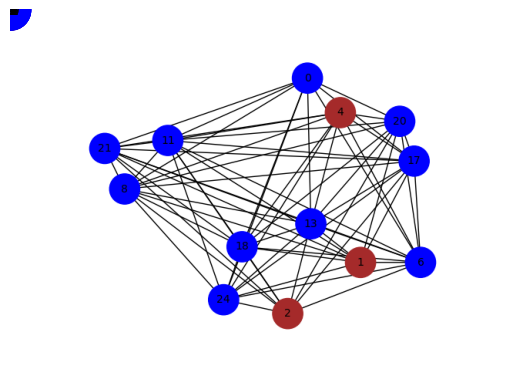

In [16]:
instance = SGAInstance("../problems/p12.json",
    populationInitializer= randomVertAndPathPI,
    populationSize = 200,
    generationsNumber = 1000,
    parentsSelector = rankingParentsSelector,
    crossover = basicCrossover,
    mutationProb = 0.7,
    mutator = neighbourMutator,
    fixer = basicFixer,
    evaluator = basicEvaluator)

firemans =SGA(instance)
disp = Displayer()
instance.problem.visualize_fire_without_burned(disp, firemans, output_path="gif12.gif")

In [17]:
instance._mutator = noMutator

res1 = []
N=20

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res1.append(burned)

print("noMutator", statistics.fmean(res1))

instance._mutator = basicMutator

res2 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res2.append(burned)

print("basicMutator", statistics.fmean(res2))

instance._mutator = neighbourMutator

res3 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res3.append(burned)

print("neighbourMutator", statistics.fmean(res3))

instance._mutator = mixedMutator

res4 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res4.append(burned)

print("mixedMutator", statistics.fmean(res4))


14
[0, 2, 4, 6, 8, 12, 13, 14, 17, 23]
14
[0, 5, 6, 12, 13, 15, 16, 17, 19, 23]
14
[1, 4, 5, 8, 11, 17, 18, 20, 21, 23]
14
[0, 7, 8, 9, 12, 14, 15, 18, 21, 23]
14
[1, 6, 9, 11, 12, 16, 17, 18, 21, 24]
14
[2, 4, 7, 12, 13, 14, 18, 19, 23, 24]
14
[0, 4, 6, 8, 11, 13, 15, 17, 21, 23]
14
[0, 4, 7, 8, 11, 16, 17, 20, 21, 23]
14
[0, 5, 6, 7, 11, 12, 16, 18, 21, 24]
14
[2, 7, 8, 9, 12, 15, 17, 19, 20, 23]
14
[2, 4, 6, 7, 8, 12, 18, 19, 21, 24]
14
[0, 2, 4, 5, 6, 14, 18, 19, 21, 22]
14
[0, 7, 10, 11, 12, 14, 15, 17, 18, 23]
14
[0, 2, 6, 7, 9, 11, 13, 19, 20, 22]
14
[0, 1, 2, 6, 14, 16, 17, 21, 22, 23]
14
[1, 2, 7, 8, 13, 14, 17, 18, 22, 23]
14
[2, 4, 5, 7, 11, 15, 20, 22, 23, 24]
14
[2, 6, 9, 11, 17, 18, 20, 22, 23, 24]
14
[0, 1, 6, 9, 10, 11, 15, 19, 20, 23]
14
[0, 1, 2, 8, 13, 14, 16, 17, 19, 20]
noMutator 14.0
14
[0, 2, 5, 8, 9, 11, 13, 18, 20, 24]
14
[0, 1, 5, 8, 9, 11, 18, 20, 21, 24]
14
[2, 4, 7, 9, 13, 14, 15, 17, 18, 24]
14
[0, 1, 2, 7, 10, 14, 19, 21, 22, 23]
14
[1, 5, 8, 10, 13, 14, 

In [18]:
print("noMutator", statistics.fmean(res1), " " ,min(res1))
print("basicMutator", statistics.fmean(res2)," " ,min(res2))
print("neighbourMutator", statistics.fmean(res3)," " ,min(res3))
print("mixedMutator", statistics.fmean(res4)," " ,min(res4))

noMutator 14.0   14
basicMutator 14.0   14
neighbourMutator 14.0   14
mixedMutator 14.0   14


In [19]:
instance._populationInitializer = basicPI

res1 = []
N=20

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res1.append(burned)


instance._populationInitializer = randomVertAndPathPI

res2 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res2.append(burned)


instance._populationInitializer = randomVertAndDistrictPI

res3 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res3.append(burned)


14
[0, 1, 2, 8, 10, 12, 16, 19, 20, 21]
14
[0, 1, 2, 4, 11, 13, 17, 18, 19, 23]
14
[0, 1, 7, 9, 10, 13, 16, 17, 22, 23]
14
[1, 2, 5, 6, 10, 11, 12, 15, 19, 22]
14
[1, 2, 6, 8, 10, 11, 14, 16, 18, 20]
14
[5, 8, 9, 10, 13, 14, 17, 21, 23, 24]
14
[0, 1, 6, 8, 10, 12, 14, 15, 16, 20]
14
[1, 12, 13, 14, 15, 16, 17, 21, 22, 24]
14
[2, 4, 5, 6, 9, 11, 12, 16, 17, 21]
14
[0, 2, 7, 9, 10, 11, 14, 18, 23, 24]
14
[2, 4, 8, 9, 10, 14, 18, 19, 22, 23]
14
[0, 1, 4, 7, 9, 17, 18, 20, 21, 24]
14
[1, 2, 4, 7, 8, 10, 13, 16, 22, 23]
14
[1, 6, 7, 9, 12, 13, 15, 17, 19, 20]
14
[4, 5, 7, 9, 17, 19, 20, 21, 22, 24]
14
[1, 4, 8, 9, 11, 13, 14, 16, 20, 24]
14
[1, 6, 7, 8, 11, 12, 20, 21, 22, 24]
14
[0, 4, 5, 6, 11, 12, 13, 15, 17, 21]
14
[1, 4, 6, 8, 12, 16, 17, 19, 20, 22]
14
[1, 6, 7, 9, 12, 14, 15, 16, 21, 22]
14
[4, 7, 8, 12, 14, 19, 20, 21, 22, 24]
14
[0, 1, 5, 8, 10, 14, 18, 19, 21, 24]
14
[1, 2, 4, 7, 11, 14, 15, 20, 22, 23]
14
[0, 8, 9, 10, 13, 14, 15, 17, 19, 23]
14
[1, 4, 6, 7, 12, 13, 15, 19, 20, 2

In [20]:
print("basicPI", statistics.fmean(res1), " " ,min(res1))
print("randomVertAndPathPI", statistics.fmean(res2)," " ,min(res2))
print("randomVertAndDistrictPI", statistics.fmean(res3)," " ,min(res3))
instance._populationInitializer = basicPI

basicPI 14.0   14
randomVertAndPathPI 14.0   14
randomVertAndDistrictPI 14.0   14


In [21]:
instance._parentsSelector = basicParentsSelector

res1 = []
N=20

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res1.append(burned)

instance._parentsSelector = rankingParentsSelector

res2 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res2.append(burned)

14
[4, 5, 7, 9, 14, 15, 16, 19, 22, 23]
14
[1, 2, 6, 10, 13, 19, 20, 21, 22, 24]
14
[0, 4, 9, 11, 12, 15, 19, 22, 23, 24]
14
[0, 1, 4, 5, 7, 8, 9, 10, 20, 21]
14
[2, 4, 5, 6, 10, 15, 17, 18, 20, 22]
14
[6, 8, 9, 10, 11, 12, 15, 17, 18, 23]
14
[4, 5, 8, 9, 12, 14, 15, 18, 23, 24]
14
[4, 6, 10, 11, 12, 13, 16, 17, 19, 22]
14
[0, 1, 5, 6, 7, 8, 10, 13, 19, 21]
14
[0, 6, 8, 9, 13, 17, 19, 20, 22, 23]
14
[0, 1, 4, 5, 7, 10, 13, 14, 21, 23]
14
[0, 5, 6, 8, 9, 14, 16, 18, 19, 20]
14
[4, 7, 10, 12, 13, 14, 19, 21, 23, 24]
14
[4, 5, 6, 8, 12, 13, 16, 17, 23, 24]
14
[4, 7, 12, 13, 16, 17, 18, 20, 21, 22]
14
[2, 5, 7, 8, 11, 13, 14, 19, 21, 22]
14
[0, 1, 9, 12, 14, 15, 16, 19, 23, 24]
14
[4, 6, 7, 8, 12, 13, 15, 17, 19, 24]
14
[1, 4, 6, 7, 8, 10, 12, 13, 14, 23]
14
[6, 7, 9, 13, 14, 19, 20, 21, 22, 23]
14
[1, 2, 6, 7, 8, 9, 12, 18, 22, 24]
14
[0, 7, 8, 9, 10, 12, 13, 14, 15, 22]
14
[2, 6, 11, 13, 14, 16, 20, 22, 23, 24]
14
[0, 1, 6, 7, 8, 9, 14, 19, 22, 23]
14
[0, 2, 4, 5, 10, 12, 13, 14, 16, 20]

In [22]:
print("basicParentsSelector", statistics.fmean(res1), " " ,min(res1))
print("rankingParentsSelector", statistics.fmean(res2)," " ,min(res2))

basicParentsSelector 14.0   14
rankingParentsSelector 14.0   14
